In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
training_data_file = open("mnist/train_data.csv", 'r')
training_data_arr = training_data_file.readlines()
training_data_file.close()

In [3]:
train_data = []
train_labels = []
labels = 10
for element in training_data_arr:
        all_val = element.split(',')
        input_arr = (np.asfarray(all_val[1:]) / 255.0 * 0.99) + 0.01
        target_arr = np.zeros(labels) + 0.01
        target_arr[int(all_val[0])] = 0.99
        train_data.append(input_arr)
        train_labels.append(np.argmax(target_arr))

1
60000 60000


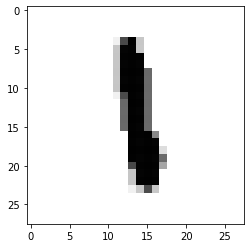

In [4]:
plt.imshow(train_data[200].reshape(28,28), cmap='Greys', interpolation='None')
print(train_labels[200])
print(len(train_data), len(train_labels))

In [5]:
test_data_file = open("mnist/test_data.csv", 'r')
test_data_arr = test_data_file.readlines()
test_data_file.close()

In [6]:
test_data = []
test_labels = []
labels = 10
for element in test_data_arr:
        all_val = element.split(',')
        input_arr = (np.asfarray(all_val[1:]) / 255.0 * 0.99) + 0.01
        target_arr = np.zeros(labels) + 0.01
        target_arr[int(all_val[0])] = 0.99
        test_data.append(input_arr)
        test_labels.append(np.argmax(target_arr))

3
10000 10000


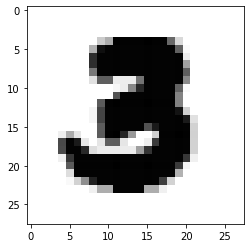

In [7]:
plt.imshow(test_data[200].reshape(28,28), cmap='Greys', interpolation='None')
print(test_labels[200])
print(len(test_data), len(test_labels))

In [8]:
model_tree = DecisionTreeClassifier(max_depth=20, max_features=64)
model_knn = KNeighborsClassifier(n_neighbors=10)

In [9]:
model_tree.fit(train_data, train_labels)
model_knn.fit(train_data, train_labels)

KNeighborsClassifier(n_neighbors=10)

In [10]:
tree_pred = model_tree.predict(test_data)
knn_pred = model_knn.predict(test_data)

In [11]:
score_tree = []
for i in range(len(tree_pred)):
    if (tree_pred[i] == test_labels[i]):
        score_tree.append(1)
    else:
        score_tree.append(0)

In [12]:
score_array = np.asarray(score_tree)
eff = score_array.sum() / score_array.size
print("Эффективность =", eff)

Эффективность = 0.8616


In [13]:
score_knn = []
for i in range(len(knn_pred)):
    if (knn_pred[i] == test_labels[i]):
        score_knn.append(1)
    else:
        score_knn.append(0)

In [14]:
score_array = np.asarray(score_knn)
eff = score_array.sum() / score_array.size
print("Эффективность =", eff)

Эффективность = 0.9665


In [19]:
score_tree1 = []
for i in tree_pred:
    for j in test_labels:
    if (i == test_labels[]):
        score_tree1.append(1)
    else:
        score_tree1.append(0)

In [20]:
score_array = np.asarray(score_tree1)
eff = score_array.sum() / score_array.size
print("Эффективность =", eff)

Эффективность = 0.1002
